In [50]:
import numpy as np
import emd
import matplotlib.pyplot as plt
import os, json
from scipy.fft import dct

import sig_analize as san
import generate_areas as ga
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
dir_path = './steel'
img_path_list = [dir_path + '/'+ f for f in os.listdir(dir_path) if f.endswith('.jpg')]
img_path_list.sort()
img_path_list

json_path = 'sequence.txt'

ga.choose_multy(img_path_list, json_path, mode='common')

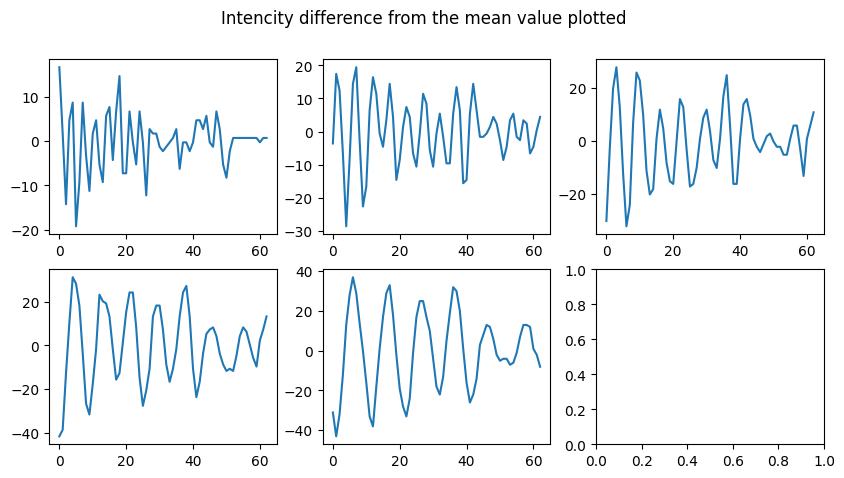

In [47]:
# upload ntencity distributions from json file and
# look at the integral intencity distribution plotted

with open(json_path,'r') as f:
    sig = json.load(f)[:-1]

img_count = len(sig)
row_count = (img_count+3-img_count%3)//3

fig, ax = plt.subplots(row_count, 3, figsize=(5*row_count, 5))

for i in range(img_count):
    ax[i//3][i%3].plot(sig[i])
plt.suptitle("Intencity difference from the mean value plotted")
plt.show()

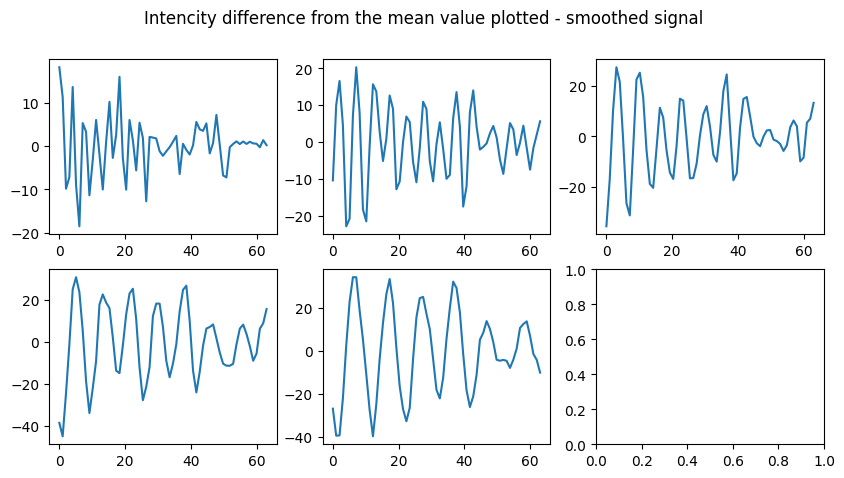

In [146]:
sig_x = np.arange(sig_len)
sig_len = len(sig[0])

cos_coeff = [dct(y) for y in sig]

N = sig_len
fs = N/sig_len

sig_sm = [san.fourie_restore(c, fs=fs, N=N, T=sig_len, mode='cos') for c in cos_coeff]


fig, ax = plt.subplots(row_count, 3, figsize=(5*row_count, 5))
for i in range(img_count):
    ax[i//3][i%3].plot(*sig_sm[i])
plt.suptitle("Intencity difference from the mean value plotted - smoothed signal")
plt.show()

In [141]:
imfs = [emd.sift.sift(y) for y in np.array(sig)]

<Axes: xlabel='Time (samples)'>

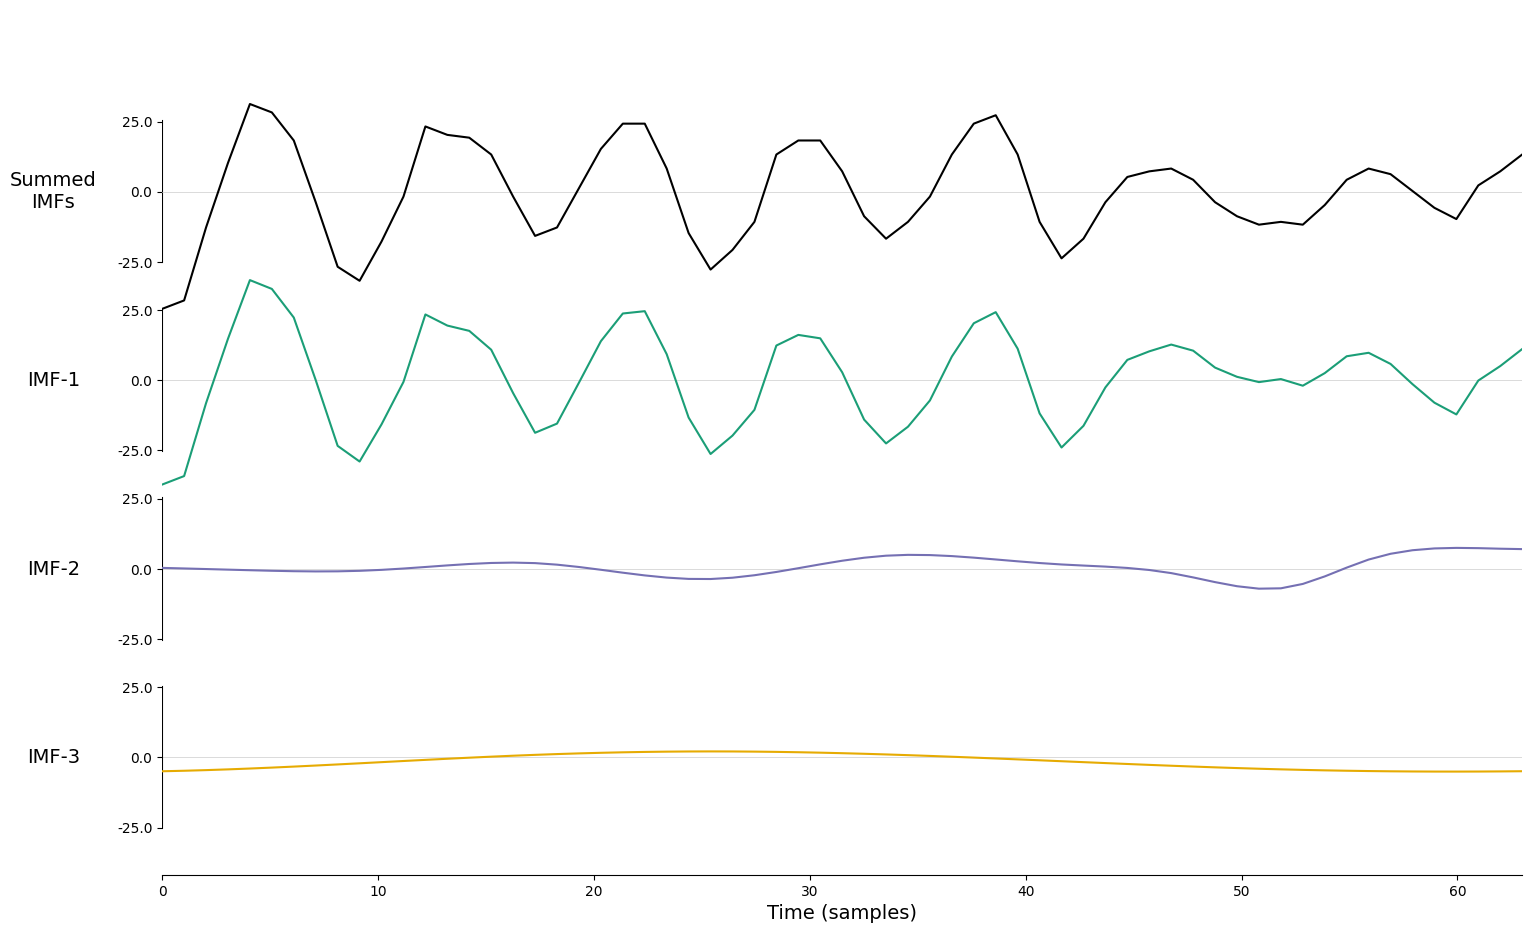

In [142]:
imf = imfs[3]
emd.plotting.plot_imfs(imf)


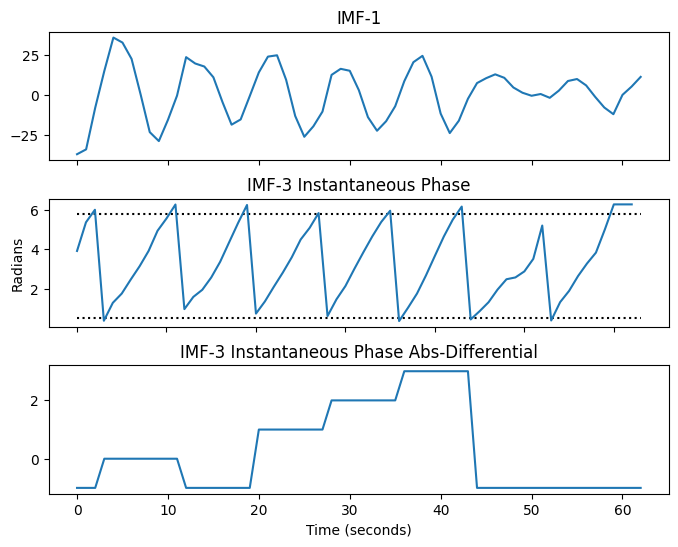

In [151]:
fs = N/sig_len


IP, IF, IA = emd.spectra.frequency_transform(imf, fs, 'nht')
good_cycles = emd.cycles.get_cycle_vector(IP, return_good=True, phase_edge=np.pi/4)


plt.figure(figsize=(8, 6))
plt.subplots_adjust(hspace=0.3)
plt.subplot(311)
plt.plot(sig_x, imf[:, imf_n])
plt.gca().set_xticklabels([])
plt.title('IMF-1')
plt.subplot(312)
plt.plot((0, sig_len), (2*np.pi-np.pi/6, 2*np.pi-np.pi/6), 'k:')
plt.plot((0, sig_len), (np.pi/6, np.pi/6), 'k:')
plt.plot(sig_x, IP[:, imf_n])
plt.title('IMF-3 Instantaneous Phase')
plt.ylabel('Radians')
plt.gca().set_xticklabels([])
plt.subplot(313)
plt.plot(sig_x, good_cycles[:,imf_n])
plt.xlabel('Time (seconds)')
plt.title('IMF-3 Instantaneous Phase Abs-Differential')
#plt.legend(['IMF-3 IP Differential', 'Jump threshold'], loc='upper right')
plt.show()

In [137]:
cycle_length = emd.cycles.get_cycle_stat(good_cycles[:,0], good_cycles[:,0], func=len) 

In [138]:
cycle_length

array([19., 17., 14.])

In [139]:
cycle_length.mean()

np.float64(16.666666666666668)